In [157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools import jarque_bera, durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.compat import lzip

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import RFE, RFECV, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.svm import SVR
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [111]:
df_ = pd.read_csv('./data/train_df_step1.csv', index_col='Id')
df_t_= pd.read_csv('./data/test_df_step1.csv', index_col='Id')
df_

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,3SsnPorch_cat,ScreenPorch_cat,MiscVal_cat,PoolArea_cat,1stFlrSF_log,AverageRoomSF_log,GrLivArea_log,LotArea_log,SalePrice_log,totSqFt_log
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,3.0,Lvl,Inside,0.0,CollgCr,Norm,Norm,...,0,0,0,0,6.752270,5.364807,7.444249,9.041922,12.247694,8.360773
2,20,RL,Pave,3.0,Lvl,FR2,0.0,Veenker,Feedr,Norm,...,0,0,0,0,7.140453,5.348694,7.140453,9.169518,12.109011,8.239065
3,60,RL,Pave,2.0,Lvl,Inside,0.0,CollgCr,Norm,Norm,...,0,0,0,0,6.824374,5.695974,7.487734,9.328123,12.317167,8.410053
4,70,RL,Pave,2.0,Lvl,Corner,0.0,Crawfor,Norm,Norm,...,0,0,0,0,6.867974,5.502424,7.448334,9.164296,11.849398,8.340456
5,60,RL,Pave,2.0,Lvl,FR2,0.0,NoRidge,Norm,Norm,...,0,0,0,0,7.043160,5.498079,7.695303,9.565214,12.429216,8.619930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,FV,Pave,3.0,Lvl,Inside,0.0,Somerst,Norm,Norm,...,0,0,0,0,7.107425,5.315666,7.107425,8.922658,12.128111,8.206038
1456,60,RL,Pave,3.0,Lvl,Inside,0.0,Gilbert,Norm,Norm,...,0,0,0,0,6.859615,5.460801,7.406711,8.976768,12.072541,8.353968
1457,20,RL,Pave,3.0,Lvl,Inside,0.0,NWAmes,Norm,Norm,...,0,0,0,0,7.636752,5.690842,7.636752,9.486076,12.254863,8.646114


In [112]:
# nominal= ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
#        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
#        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#        'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
#        'GarageType', 'SaleType', 'SaleCondition', '3SsnPorch_cat',
#        'BsmtFinSF2_cat', 'EnclosedPorch_cat', 'LowQualFinSF_cat',
#        'MiscVal_cat', 'PoolArea_cat', 'ScreenPorch_cat', 'RenovatedY/N']

# ordinal = ['MSSubClass', 'LotShape', 'LandSlope', 'OverallQual',
#        'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
#        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
#        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
#        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
#        'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'AgeWhenSold', 'totBath', 'YearBuilt',
#        'YearRemodAdd', 'GarageYrBlt', 'YrSold']

# continuous = ['2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'MasVnrArea',
#        'MoSold_cos', 'MoSold_sin', 'OpenPorchSF', 'TotalBsmtSF',
#        'WoodDeckSF', '1stFlrSF_log', 'GrLivArea_log', 'LotArea_log',
#        'totSqFt_log', 'SalePrice_log']

In [181]:


nominal = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'SaleType', 'SaleCondition',
       'Street', 'CentralAir', 'RenovatedY/N', '2ndFloorY/N', 'PorchY/N',
       'BsmtFinSF2_cat', 'LowQualFinSF_cat', 'EnclosedPorch_cat',
       '3SsnPorch_cat', 'ScreenPorch_cat', 'MiscVal_cat', 'PoolArea_cat']

ordinal = ['MSSubClass', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'YrSold', 'AgeWhenSold', 'totBath', 'OtherRooms']

continuous = ['2ndFlrSF', 'BsmtFinSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea',
       'GarageSpaceForCar', 'MasVnrArea', 'MoSold_cos', 'MoSold_sin',
       'OpenPorchSF', 'TotalBsmtFinSF', 'TotalBsmtSF', 'TotalPorchSF',
       'WoodDeckOpenPorch', 'WoodDeckSF', '1stFlrSF_log',
       'AverageRoomSF_log', 'GrLivArea_log', 'LotArea_log',
       'SalePrice_log', 'totSqFt_log']

## OHE

In [182]:
def one_hot_enc(train_df, test_df, columns):
    train_df['Status'] = 'Train'
    test_df['Status'] = 'Test'
    
    app_df = train_df.append(test_df)
    
    merded_app_df = pd.concat([pd.get_dummies(app_df[columns], drop_first=True), 
                           app_df.loc[:, app_df.columns[~app_df.columns.isin(columns)]]], axis=1)
    
    train_df_enc = merded_app_df.loc[merded_app_df['Status'] == 'Train']
    train_df_enc.drop('Status', axis=1, inplace=True)

    test_df_enc = merded_app_df.loc[merded_app_df['Status'] == 'Test']
    test_df_enc.drop(['Status', 'SalePrice_log'], axis=1, inplace=True)


    print(train_df_enc.shape, test_df_enc.shape)
    
    return train_df_enc, test_df_enc

In [183]:
train_df, test_df = one_hot_enc(st_train_df, st_test_df, nominal)

(1252, 207) (1459, 206)


In [184]:
len(ordinal + continuous), len(app_df.columns[~app_df.columns.isin(nominal)]) - 1 # minus Status

(55, 55)

## Standartization

In [158]:
def standartize(df, columns):
    st_df = df.copy()
    
    scaler = SatndardScaler()  # RobustScaler
    
    st_df[columns] = scaler.fit_transform(df[columns])
    print(df.shape, st_df.shape)
    
    return st_df

In [159]:
st_train_df = standartize(df_, ordinal + continuous)

arr_to_standartize_test = ordinal + continuous
arr_to_standartize_test.remove('SalePrice_log')
st_test_df = standartize(df_t_, arr_to_standartize_test)

(1252, 87) (1252, 87)
(1459, 86) (1459, 86)


In [119]:
train_df.shape

(1252, 207)

In [122]:
# Q1_ = train_df[continuous].quantile(0.15)
# Q3_ = train_df[continuous].quantile(0.85)
# IQR_ = Q3_ - Q1_

# outl_train_df = train_df[~((train_df < (Q1_ - 1.5 * IQR_)) | (train_df > (Q3_ + 1.5 * IQR_))).any(axis=1)]
# outl_train_df.shape

(1168, 207)

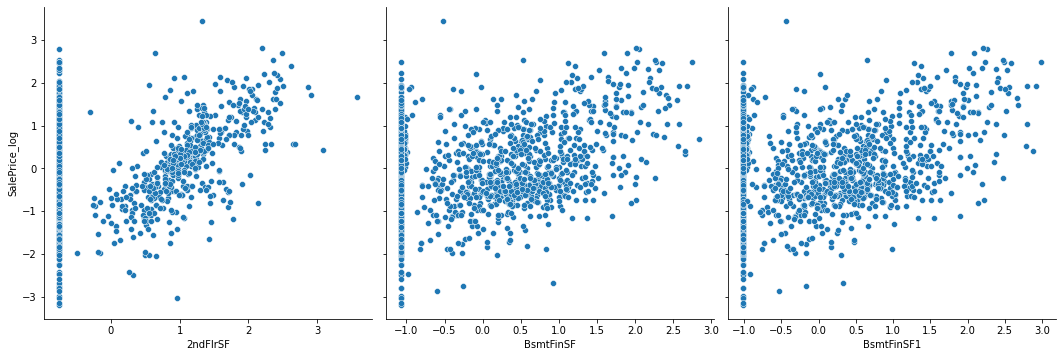

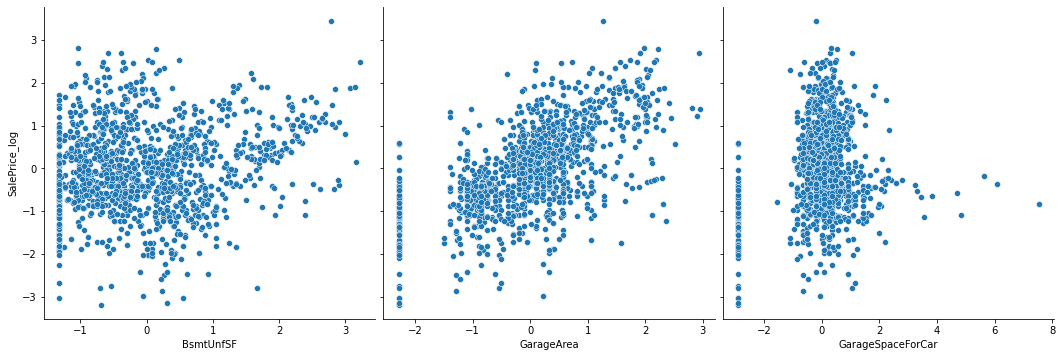

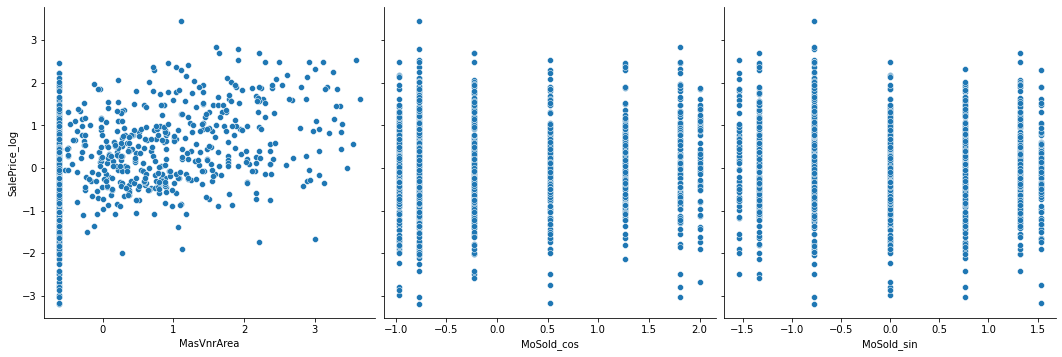

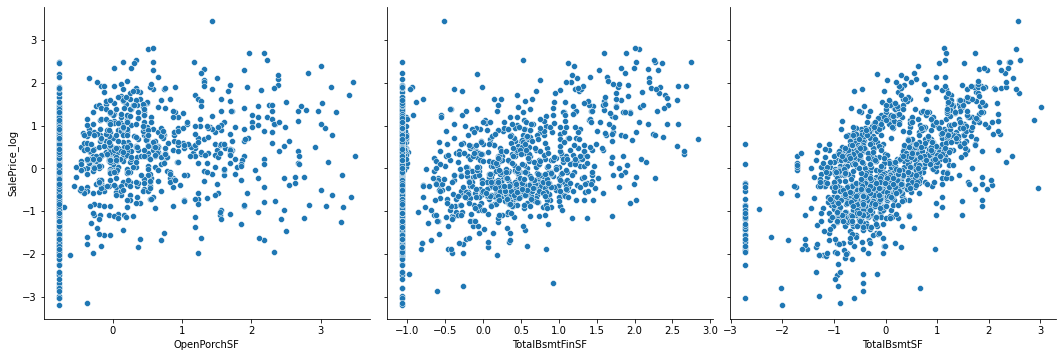

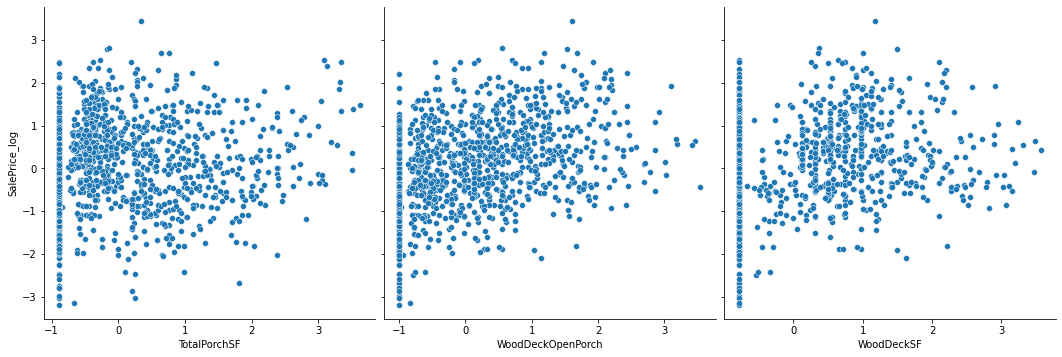

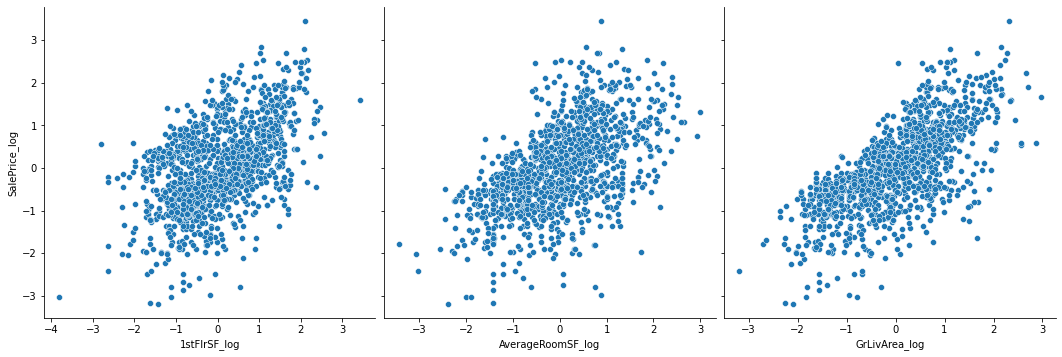

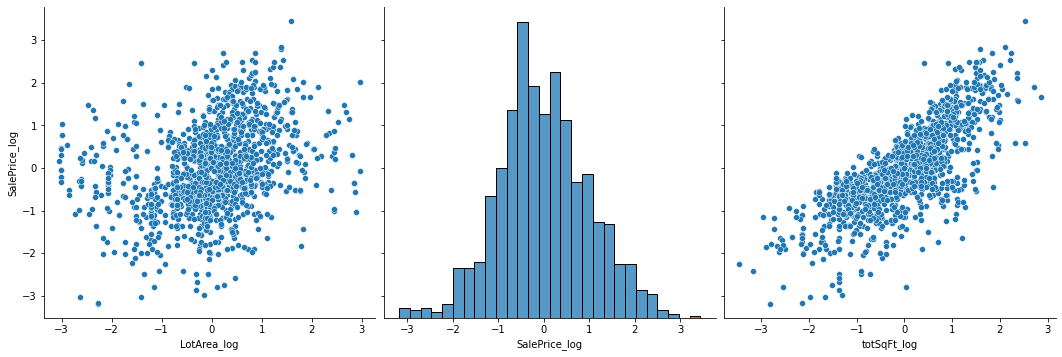

In [123]:
for i in range(0, len(continuous), 3):
    sns.pairplot(data=outl_train_df,
                      y_vars=['SalePrice_log'],
                      x_vars=(continuous)[i:i+3],
                         height=5, aspect=1)

In [163]:
y = train_df['SalePrice_log']
X = train_df.drop('SalePrice_log', axis=1)

In [164]:
# y = outl_train_df['SalePrice_log']
# X = outl_train_df.drop('SalePrice_log', axis=1)

## OLS

In [165]:
# F-statistic: Null hypothesis of the F-test that the model’s parameter values are not jointly significant. 
#     This model is no better than a mean model.

X_add_const = sm.add_constant(X)

first_model = sm.OLS(y, X_add_const).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     81.28
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:16:15   Log-Likelihood:                 263.35
No. Observations:                1252   AIC:                            -138.7
Df Residuals:                    1058   BIC:                             857.0
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8428      0.431     -4.274      0.000      -2.689      -0.997
2ndFloorY/N              -0.0915      0.074     -1.242      0.215      -0.236       0.053
PorchY/N                 -0.0310      0.022     -1.401      0.161      -0.074       0.012
BsmtFinSF2_cat           -0.0554      0.049     -1.138      0.255      -0.151       0.040
LowQualFinSF_cat         -0.0504      0.073     -0.691      0.490      -0.194       0.093
EnclosedPorch_cat         0.0010      0.039      0.025      0.980      -0.075       0.077
3SsnPorch_cat            -0.0212      0.063     -0.334      0.739      -0.146       0.103
ScreenPorch_cat           0.0304      0.043      0.701      0.483      -0.055       0.115
MiscVal_cat              -0.0173      0.036     -0.478      0.632      -0.088       0.054
PoolArea_cat              0.2581      0.157      1.645      0.100      -0.050       0.566
MSZoning_FV               0.5576      0.133      4.190      0.000       0.296       0.819
MSZoning_RH               0.4860      0.133      3.663      0.000       0.226       0.746
MSZoning_RL               0.4784      0.118      4.063      0.000       0.247       0.709
MSZoning_RM               0.3974      0.112      3.553      0.000       0.178       0.617
LandContour_HLS           0.0245      0.052      0.474      0.636      -0.077       0.126
LandContour_Low          -0.1134      0.067     -1.688      0.092      -0.245       0.018
LandContour_Lvl          -0.0032      0.036     -0.089      0.929      -0.075       0.068
LotConfig_CulDSac         0.0284      0.032      0.878      0.380      -0.035       0.092
LotConfig_FR2            -0.0809      0.041     -1.979      0.048      -0.161      -0.001
LotConfig_FR3            -0.1810      0.119     -1.515      0.130      -0.415       0.053
LotConfig_Inside         -0.0260      0.018     -1.466      0.143      -0.061       0.009
Neighborhood_Blueste  -2.917e-15   2.06e-15     -1.417      0.157   -6.96e-15    1.12e-15
Neighborhood_BrDale    8.968e-16    1.1e-15      0.818      0.414   -1.26e-15    3.05e-15
Neighborhood_BrkSide      0.0769      0.098      0.787      0.432      -0.115       0.269
Neighborhood_ClearCr     -0.0527      0.101     -0.521      0.602      -0.251       0.146
Neighborhood_CollgCr     -0.0914      0.077     -1.180      0.238      -0.243       0.061
Neighborhood_Crawfor      0.2201      0.090      2.445      0.015       0.043       0.397
Neighborhood_Edwards     -0.1894      0.085     -2.235      0.026      -0.356      -0.023
Neighborhood_Gilbert     -0.0887      0.082     -1.083      0.279      -0.250       0.072
Neighborhood_IDOTRR      -0.0650      0.110     -0.594      0.553      -0.280       0.150
Neighborhood_MeadowV     -0.2929      0.238     -1.233      0.218      -0.759       0.173
Neighborhood_Mitchel   

In [166]:
## Visualize Residuals

def plot_residuals(model):
    
    print('Linearity of the model\n')
    plt.figure(1)
    sns.residplot(model.fittedvalues,  model.model.endog, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color':'red'})
    plt.title('Linearity check')
    plt.xlabel('Fitted')
    plt.ylabel('Residuals')
    plt.show(1)
    
    print('='*60)
    
    print('\nExpectation (mean) of residuals is zero?\n')
    print('Residuals mean: ', model.resid.mean(), '\n')
    
    print('='*60)
    
    print('\nNormality and Homoscedasticity (equal variance) of residuals\n')
    
    fig, (ax1, ax2) = plt.subplots(ncols=2,
                                      figsize=(14, 5),
                                      gridspec_kw={'width_ratios': [0.5, 0.5]})
    sm.qqplot(model.resid,
                dist=stats.norm,
                line='45',
                fit=True,
                ax=ax1)
    ax1.set_title('Q-Q Plot', fontdict={"size": 15})
            # plot 2
            # uses The predicted values for the original (unwhitened) design.
    ax2.scatter(x=model.fittedvalues, 
                y=model.resid,
                s=4,
                color='green')
    ax2.axhline(y=0, color='r')

    ax2.set_title('Residuals scatter', fontdict={"size": 15})
    ax2.set_xlabel('Fitted')
    ax2.set_ylabel('Residuals')

    plt.show()
    
    
    print('-'*60)
    
    # Jarque-Bera Normality of the residuals test:
    print('Residuals normality test')
    jbname = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
    jbtest = jarque_bera(model.resid)
    print('Jarque-Bera test:', *lzip(jbname, jbtest)[0:2])
    
    print('-'*60)
    # Breush-Pagan Test
    # H0: the error variances are all equal. 
    # H1: the error variances are not equal. 
    print('Residuals homoscedasticity/heteroskedasticity test')
    bpname = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
    bptest = het_breuschpagan(model.resid, model.model.exog)
    print('Breush-Pagan test:', *lzip(bpname, bptest)[0:2])
    
    
    print('='*60)
    print('\nAutocorrelation of residuals\n')

    acf_ = plot_acf(model.resid, lags=40 , alpha=0.05)
    acf_.show()
    # The Durbin-Watson statistic will always have a value ranging between 0 and 4. 
    # A value of 2.0 indicates there is no autocorrelation detected in the sample. 
    # Values [0, 2) point to positive autocorrelation and values (2, 4] means negative autocorrelation.
    print('-'*60)
    print('Durbin-Watson statistic: ', durbin_watson(model.resid))

Linearity of the model



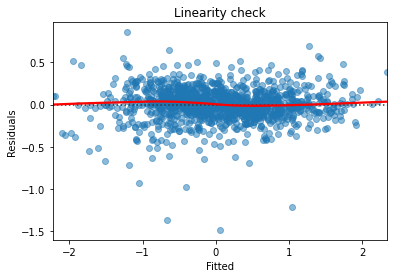


Expectation (mean) of residuals is zero?

Residuals mean:  -1.484402324168601e-14 


Normality and Homoscedasticity (equal variance) of residuals



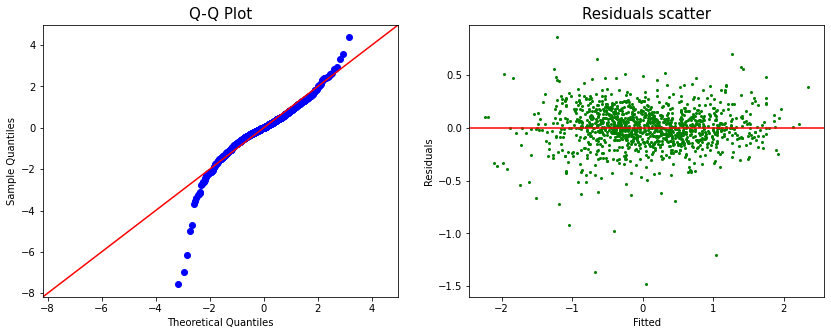

------------------------------------------------------------
Residuals normality test
Jarque-Bera test: ('Jarque-Bera', 2701.7524922131893) ('Chi^2 two-tail prob.', 0.0)
------------------------------------------------------------
Residuals homoscedasticity/heteroskedasticity test
Breush-Pagan test: ('Lagrange multiplier statistic', 202.07120133650434) ('p-value', 0.5643069061995989)

Autocorrelation of residuals

------------------------------------------------------------
Durbin-Watson statistic:  1.9474701298877253


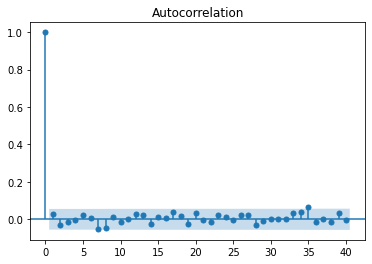

In [167]:
plot_residuals(first_model)

## Check Multicollinearity

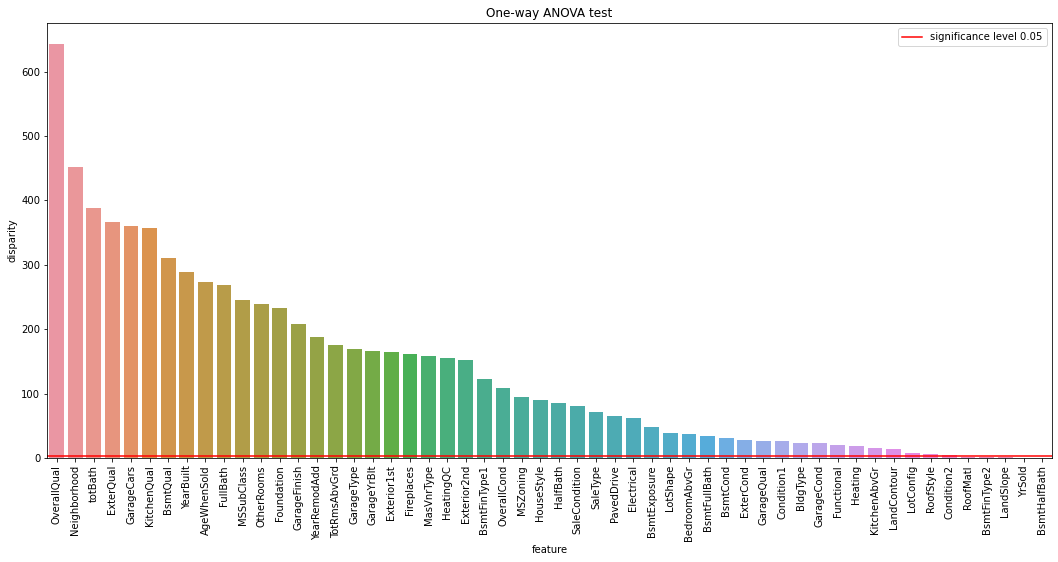
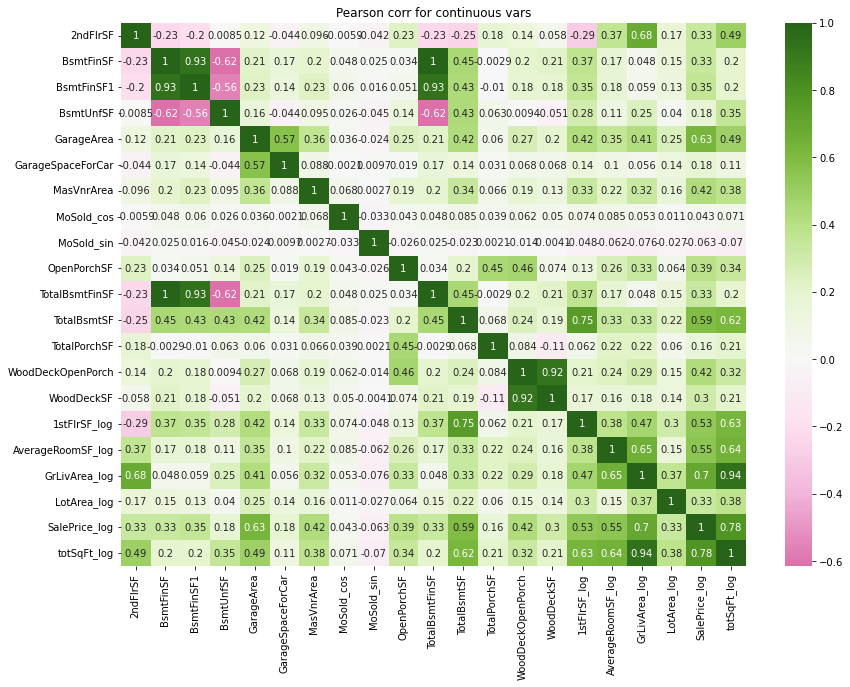
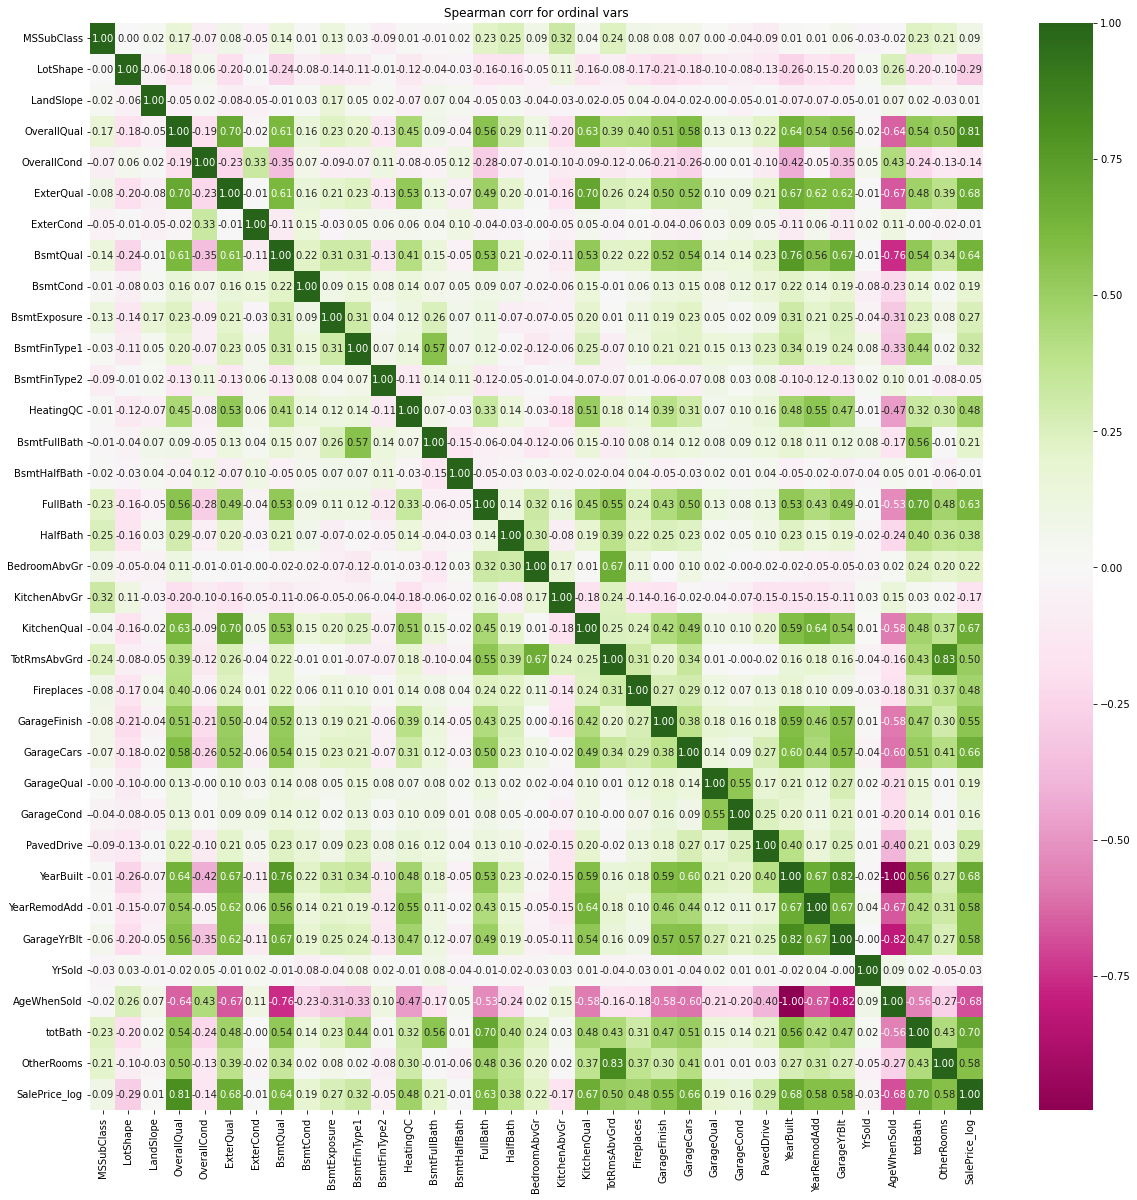

### VIF (Коеффициент вздутия дисперсии)

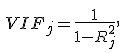
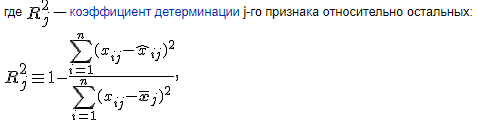

In [129]:
 # Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [130]:
cont_indep = continuous.copy()
cont_indep.remove('SalePrice_log')
vif_= calc_vif(train_df[ordinal + cont_indep])
vif_.loc[vif_['VIF'] >= 4].sort_values('VIF', ascending=False)

,variables,VIF
13,BsmtFullBath,inf
45,TotalBsmtSF,inf
43,OpenPorchSF,inf
47,WoodDeckOpenPorch,inf
37,BsmtUnfSF,inf
48,WoodDeckSF,inf
35,BsmtFinSF,inf
14,BsmtHalfBath,inf
33,OtherRooms,inf
32,totBath,inf


In [131]:
np.asarray(vif_.loc[vif_['VIF'] >= 5]['variables'])

array(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'YearBuilt', 'YrSold', 'AgeWhenSold', 'totBath', 'OtherRooms',
       '2ndFlrSF', 'BsmtFinSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea',
       'OpenPorchSF', 'TotalBsmtFinSF', 'TotalBsmtSF',
       'WoodDeckOpenPorch', 'WoodDeckSF', '1stFlrSF_log',
       'AverageRoomSF_log', 'GrLivArea_log', 'totSqFt_log'], dtype=object)

## Drop features

In [132]:
# serial_corr_cols_to_drop = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
#        'GarageCars', 'YearBuilt', 'YrSold','2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 
#         'TotalBsmtSF', '1stFlrSF_log', 'GrLivArea_log', 'MoSold_cos', 'MoSold_sin',
#        'MSSubClass', 'LandSlope', 'ExterCond', 'BsmtFinType2', 'GarageCond']

In [133]:
# serial_corr_cols_to_drop = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
#        'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars','YearBuilt', 'YrSold', 
#        'GarageYrBlt', 'TotRmsAbvGrd',
#        'BsmtFinSF', 'BsmtFinSF1', #'GarageArea',
#        'TotalBsmtSF','1stFlrSF_log', 
#        'WoodDeckSF', 'AverageRoomSF_log',
#        'GrLivArea_log']

In [134]:
df_.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'SaleType',
       'SaleCondition', 'MoSold_sin', 'MoSold_cos', 'RenovatedY/N',
       'AgeWhenS

In [168]:
serial_corr_cols_to_drop = ['YrSold', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea_log', 'BsmtFinSF2_cat',
        '1stFlrSF_log', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BsmtFinSF1', 'BsmtFinSF2_cat', 'BsmtFinSF', 'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'GarageArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch_cat',
        '3SsnPorch_cat', 'PoolArea_cat', 'RoofStyle', 'RoofMatl', 'Condition2', 'BsmtFinType1', 'LandSlope', 'Exterior2nd']

In [169]:
train_df1 = df_.copy()
test_df1 = df_t_.copy()


train_df1.drop(serial_corr_cols_to_drop, axis=1, inplace=True)
test_df1.drop(serial_corr_cols_to_drop, axis=1, inplace=True)

nominal1 = list(set(nominal) - set(serial_corr_cols_to_drop))
ordinal1 = list(set(ordinal) - set(serial_corr_cols_to_drop))
continuous1 = list(set(continuous) - set(serial_corr_cols_to_drop))
cont_indep1 =  list(set(cont_indep) - set(serial_corr_cols_to_drop))

In [170]:
st_train_df1 = standartize(train_df1, ordinal1 + continuous1)

arr_to_standartize_test1 = ordinal1 + continuous1
arr_to_standartize_test1.remove('SalePrice_log')
st_test_df1 = standartize(test_df1, arr_to_standartize_test1)

(1252, 58) (1252, 58)
(1459, 57) (1459, 57)


In [171]:
train_df1, test_df1 = one_hot_enc(st_train_df1, st_test_df1, nominal1)

(1252, 151) (1459, 150)


In [139]:
train_df1.shape

(1252, 151)

In [156]:
# Q1_ = train_df1[continuous1].quantile(0.1)
# Q3_ = train_df1[continuous1].quantile(0.9)
# IQR_ = Q3_ - Q1_

# outl_train_df1 = train_df1[~((train_df1 < (Q1_ - 1.5 * IQR_)) | (train_df1 > (Q3_ + 1.5 * IQR_))).any(axis=1)]
# outl_train_df1.shape

In [172]:
y = train_df1['SalePrice_log']
X = train_df1.drop('SalePrice_log', axis=1)

In [152]:
# y = outl_train_df1['SalePrice_log']
# X = outl_train_df1.drop('SalePrice_log', axis=1)

## Backward Selection

In [142]:
def backward_regression(X, y,
                           threshold_out = 0.05,
                           verbose=False):
    
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, pd.DataFrame(X[included])).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  `{:25}`  with p-value = {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
            
    return included ,model


In [173]:
X_add_const = sm.add_constant(X)

back_included, back_model = backward_regression(X_add_const, y, verbose=True)

Drop  `BldgType_TwnhsE          `  with p-value = 0.995259
Drop  `Exterior1st_Wd Sdng      `  with p-value = 0.991948
Drop  `Condition1_RRNe          `  with p-value = 0.976848
Drop  `Condition1_PosA          `  with p-value = 0.949429
Drop  `Neighborhood_NoRidge     `  with p-value = 0.923367
Drop  `SaleType_WD              `  with p-value = 0.921404
Drop  `Exterior1st_Stone        `  with p-value = 0.917998
Drop  `LandContour_Lvl          `  with p-value = 0.910374
Drop  `HouseStyle_2.5Unf        `  with p-value = 0.915333
Drop  `HouseStyle_2.5Fin        `  with p-value = 0.899631
Drop  `BldgType_Twnhs           `  with p-value = 0.883551
Drop  `Functional_Sev           `  with p-value = 0.928237
Drop  `Neighborhood_Blueste     `  with p-value = 0.957512
Drop  `HouseStyle_SFoyer        `  with p-value = 0.87787
Drop  `HouseStyle_SLvl          `  with p-value = 0.895377
Drop  `Heating_Grav             `  with p-value = 0.878518
Drop  `Functional_Min1          `  with p-value = 0.85367

In [174]:
back_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     232.3
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:17:00   Log-Likelihood:                 174.44
No. Observations:                1252   AIC:                            -216.9
Df Residuals:                    1186   BIC:                             121.9
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1368      0.166     -6.854      0.000      -1.462      -0.811
PorchY/N                -0.0605      0.019     -3.171      0.002      -0.098      -0.023
SaleCondition_Normal     0.1187      0.022      5.450      0.000       0.076       0.161
MasVnrType_BrkFace       0.0345      0.017      2.070      0.039       0.002       0.067
MasVnrType_Stone         0.1160      0.028      4.123      0.000       0.061       0.171
LandContour_Low         -0.1156      0.050     -2.319      0.021      -0.213      -0.018
Neighborhood_CollgCr    -0.1390      0.027     -5.125      0.000      -0.192      -0.086
Neighborhood_Crawfor     0.1826      0.038      4.824      0.000       0.108       0.257
Neighborhood_Edwards    -0.2039      0.030     -6.715      0.000      -0.263      -0.144
Neighborhood_Gilbert    -0.1515      0.035     -4.343      0.000      -0.220      -0.083
Neighborhood_IDOTRR     -0.1255      0.053     -2.384      0.017      -0.229      -0.022
Neighborhood_Mitchel    -0.1872      0.039     -4.831      0.000      -0.263      -0.111
Neighborhood_NAmes      -0.1212      0.027     -4.565      0.000      -0.173      -0.069
Neighborhood_NWAmes     -0.1633      0.036     -4.580      0.000      -0.233      -0.093
Neighborhood_OldTown    -0.0974      0.036     -2.677      0.008      -0.169      -0.026
Neighborhood_Sawyer     -0.1263      0.034     -3.680      0.000      -0.194      -0.059
Neighborhood_SawyerW    -0.1415      0.036     -3.962      0.000      -0.212      -0.071
Neighborhood_StoneBr     0.1746      0.053      3.296      0.001       0.071       0.279
Neighborhood_Timber     -0.1197      0.046     -2.607      0.009      -0.210      -0.030
Foundation_PConc         0.0664      0.021      3.168      0.002       0.025       0.108
Foundation_Stone         0.3275      0.102      3.224      0.001       0.128       0.527
Foundation_Wood         -0.2733      0.129     -2.111      0.035      -0.527      -0.019
Street_Pave              0.3250      0.139      2.338      0.020       0.052       0.598
Exterior1st_BrkComm     -0.3385      0.165     -2.049      0.041      -0.663      -0.014
Exterior1st_BrkFace      0.2072      0.036      5.709      0.000       0.136       0.278
Exterior1st_MetalSd      0.0488      0.018      2.650      0.008       0.013       0.085
HouseStyle_1Story       -0.0533      0.018     -3.044      0.002      -0.088      -0.019
Condition1_Feedr         0.1191      0.039      3.068      0.002       0.043       0.195
Condition1_Norm          0.2005      0.030      6.714      0.000       0.142       0.259
Condition1_PosN          0.2543      0.068      3.724      0.000       0.120       0.388
Condition1_RRAn          0.1340      0.057      2.357      0.019       0.022       0.246
Condition1_RRNn          0.2096      0.107      1.964    

Linearity of the model



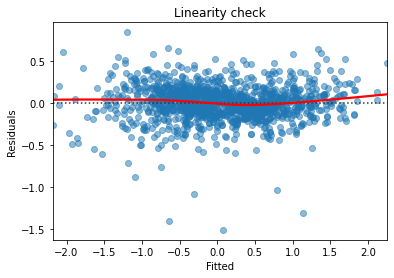


Expectation (mean) of residuals is zero?

Residuals mean:  -7.586937822753926e-15 


Normality and Homoscedasticity (equal variance) of residuals



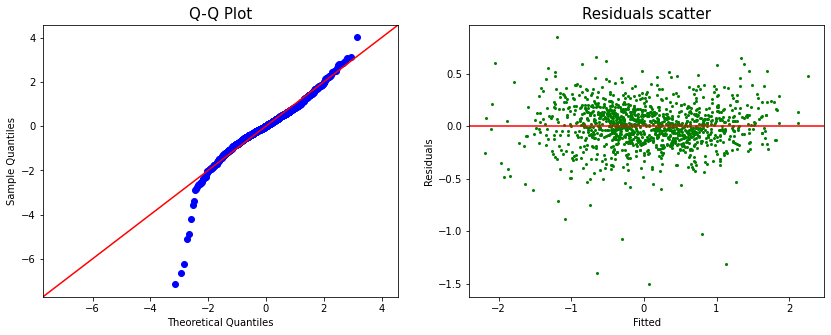

------------------------------------------------------------
Residuals normality test
Jarque-Bera test: ('Jarque-Bera', 2036.4237572093443) ('Chi^2 two-tail prob.', 0.0)
------------------------------------------------------------
Residuals homoscedasticity/heteroskedasticity test
Breush-Pagan test: ('Lagrange multiplier statistic', 117.51699172941309) ('p-value', 7.228420766772986e-05)

Autocorrelation of residuals

------------------------------------------------------------
Durbin-Watson statistic:  1.9501872354564613


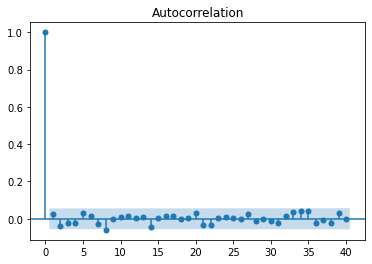

In [175]:
plot_residuals(back_model)

In [151]:
## Shapiro-Wilk Test

stat, p = stats.shapiro(back_model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.936, p=0.000
Sample does not look Gaussian (reject H0)


## Forward Selection

In [79]:
def forward_regression(X, y,
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
#     initial_list = []
    included = list(initial_list)
    included_pval = list()
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
#         print(excluded)
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, pd.DataFrame(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
#             print(best_feature)
            included.append(best_feature)
            included_pval.append(best_pval)
            changed=True
            if verbose:
                print('Add  `{:25}`  with p-value = {:.6}'.format(best_feature, best_pval))

        if not changed:
            break
            
    print(included)
#     print('-' * 30)
#     print(included_pval)

    return  included, model #pd.Series(included_pval, index=included, name='pvalue').to_frame(),



In [176]:
X_add_const = sm.add_constant(X)

forw_included, forw_model = forward_regression(X_add_const, y, initial_list =['const'])

Add  `OverallQual              `  with p-value = 3.50816e-288
Add  `totSqFt_log              `  with p-value = 1.96119e-121
Add  `AgeWhenSold              `  with p-value = 7.53979e-67
Add  `OverallCond              `  with p-value = 2.27096e-52
Add  `TotalBsmtFinSF           `  with p-value = 5.07229e-28
Add  `Neighborhood_Crawfor     `  with p-value = 1.51808e-15
Add  `KitchenQual              `  with p-value = 1.18468e-14
Add  `LotArea_log              `  with p-value = 8.80931e-17
Add  `SaleType_New             `  with p-value = 1.47964e-08
Add  `SaleCondition_Normal     `  with p-value = 1.73757e-11
Add  `Foundation_PConc         `  with p-value = 5.44002e-07
Add  `Fireplaces               `  with p-value = 5.08222e-07
Add  `TotalPorchSF             `  with p-value = 1.69501e-05
Add  `OtherRooms               `  with p-value = 1.2547e-05
Add  `Neighborhood_BrkSide     `  with p-value = 1.14331e-05
Add  `Condition1_Norm          `  with p-value = 1.88957e-05
Add  `Exterior1st_BrkFa

In [177]:
forw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     371.4
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:17:39   Log-Likelihood:                 122.33
No. Observations:                1252   AIC:                            -166.7
Df Residuals:                    1213   BIC:                             33.51
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8087      0.138     -5.870      0.000      -1.079      -0.538
OverallQual              0.2232      0.018     12.366      0.000       0.188       0.259
totSqFt_log              0.3338      0.020     16.623      0.000       0.294       0.373
AgeWhenSold             -0.2754      0.021    -13.079      0.000      -0.317      -0.234
OverallCond              0.0851      0.007     11.367      0.000       0.070       0.100
TotalBsmtFinSF           0.1196      0.015      8.180      0.000       0.091       0.148
Neighborhood_Crawfor     0.2989      0.036      8.227      0.000       0.228       0.370
KitchenQual              0.0593      0.015      4.005      0.000       0.030       0.088
LotArea_log              0.0745      0.008      9.039      0.000       0.058       0.091
SaleType_New             0.2472      0.034      7.284      0.000       0.181       0.314
SaleCondition_Normal     0.1330      0.022      6.058      0.000       0.090       0.176
Foundation_PConc         0.0571      0.020      2.839      0.005       0.018       0.097
Fireplaces               0.0407      0.012      3.298      0.001       0.016       0.065
TotalPorchSF             0.0627      0.012      5.079      0.000       0.038       0.087
OtherRooms               0.0508      0.010      5.273      0.000       0.032       0.070
Neighborhood_BrkSide     0.1733      0.034      5.124      0.000       0.107       0.240
Condition1_Norm          0.0964      0.019      5.124      0.000       0.059       0.133
Exterior1st_BrkFace      0.1967      0.036      5.496      0.000       0.126       0.267
Functional_Typ           0.1167      0.030      3.849      0.000       0.057       0.176
WoodDeckOpenPorch        0.0433      0.012      3.580      0.000       0.020       0.067
AverageRoomSF_log        0.0504      0.014      3.602      0.000       0.023       0.078
MasVnrType_Stone         0.0865      0.028      3.123      0.002       0.032       0.141
Neighborhood_StoneBr     0.2399      0.053      4.539      0.000       0.136       0.344
GarageSpaceForCar        0.0182      0.005      3.661      0.000       0.008       0.028
totBath                  0.0519      0.013      3.932      0.000       0.026       0.078
Neighborhood_NridgHt     0.1682      0.037      4.534      0.000       0.095       0.241
Functional_Maj2         -0.4335      0.106     -4.107      0.000      -0.641      -0.226
HeatingQC                0.0576      0.017      3.395      0.001       0.024       0.091
MSZoning_RM             -0.0805      0.023     -3.431      0.001      -0.126      -0.034
Functional_Mod          -0.2574      0.073     -3.510      0.000      -0.401      -0.114
Street_Pave              0.4403      0.131      3.349      0.001       0.182       0.698
BsmtExposure             0.0252      0.007      3.584    

Linearity of the model



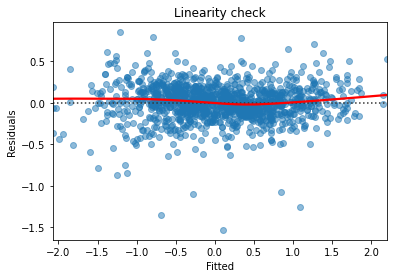


Expectation (mean) of residuals is zero?

Residuals mean:  -1.0792529454438198e-15 


Normality and Homoscedasticity (equal variance) of residuals



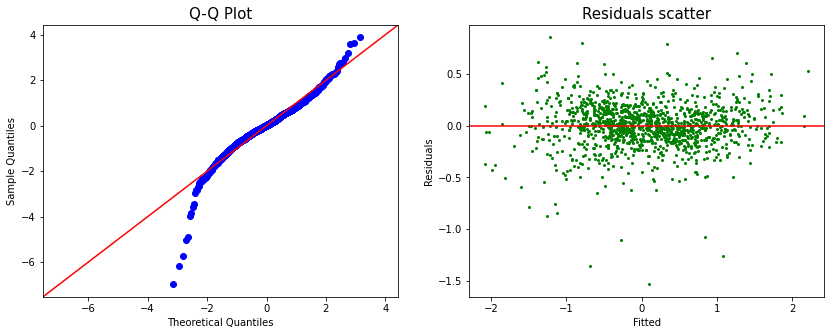

------------------------------------------------------------
Residuals normality test
Jarque-Bera test: ('Jarque-Bera', 1600.390822206306) ('Chi^2 two-tail prob.', 0.0)
------------------------------------------------------------
Residuals homoscedasticity/heteroskedasticity test
Breush-Pagan test: ('Lagrange multiplier statistic', 117.03609079324688) ('p-value', 5.5720638317736e-10)

Autocorrelation of residuals

------------------------------------------------------------
Durbin-Watson statistic:  1.9738440299399338


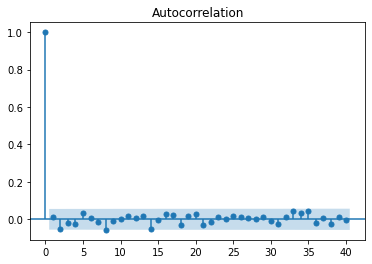

In [178]:
plot_residuals(forw_model)

In [156]:
## Shapiro-Wilk Test

stat, p = stats.shapiro(forw_model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.942, p=0.000
Sample does not look Gaussian (reject H0)


## Recursive feature elimination (SVR estimator)

In [86]:
y = train_df['SalePrice_log']
X = train_df.drop('SalePrice_log', axis=1)

In [91]:
# https://www.researchgate.net/profile/Quanzhong-Liu-2/publication/220637867_Feature_selection_for_support_vector_machines_with_RBF_kernel/links/557ea92508aeea18b777e492/Feature-selection-for-support-vector-machines-with-RBF-kernel.pdf

estimator = SVR(kernel="linear")
selector = RFE(estimator) 
selector = selector.fit(X, y.values.ravel())

In [93]:
X.columns[selector.support_].shape

(103,)

In [94]:
X_RFE = X[X.columns[selector.support_]]

lin_reg = LinearRegression()

lin_reg.fit(X_RFE, y)

LinearRegression()

In [102]:
y_pred = lin_reg.predict(X_RFE)
print('R2: ', metrics.r2_score(y, y_pred))
print('MSE', metrics.mean_squared_error(y, y_pred))

R2:  0.9301993312440169
MSE 0.06980066875598315


In [104]:
X_RFE_const = sm.add_constant(X_RFE)
RFE_model = sm.OLS(y, X_RFE_const).fit()
RFE_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     151.9
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:18:34   Log-Likelihood:                -102.97
No. Observations:                1252   AIC:                             411.9
Df Residuals:                    1149   BIC:                             940.6
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3078      0.344     -6.709      0.000      -2.983      -1.633
2ndFloorY/N              -0.0576      0.058     -0.999      0.318      -0.171       0.056
BsmtFinSF2_cat           -0.0403      0.028     -1.430      0.153      -0.096       0.015
3SsnPorch_cat            -0.0272      0.066     -0.411      0.681      -0.157       0.102
PoolArea_cat              0.3565      0.198      1.804      0.072      -0.031       0.744
MSZoning_FV               0.7236      0.157      4.620      0.000       0.416       1.031
MSZoning_RH               0.6187      0.151      4.092      0.000       0.322       0.915
MSZoning_RL               0.6467      0.135      4.783      0.000       0.381       0.912
MSZoning_RM               0.5116      0.135      3.804      0.000       0.248       0.776
LandContour_Low          -0.1239      0.066     -1.871      0.062      -0.254       0.006
LotConfig_FR2            -0.0972      0.047     -2.063      0.039      -0.190      -0.005
LotConfig_FR3            -0.1542      0.148     -1.042      0.298      -0.444       0.136
Neighborhood_BrkSide      0.1319      0.053      2.500      0.013       0.028       0.235
Neighborhood_CollgCr     -0.1086      0.047     -2.294      0.022      -0.201      -0.016
Neighborhood_Crawfor      0.2687      0.053      5.082      0.000       0.165       0.372
Neighborhood_Edwards     -0.2066      0.045     -4.545      0.000      -0.296      -0.117
Neighborhood_Gilbert     -0.1254      0.055     -2.262      0.024      -0.234      -0.017
Neighborhood_MeadowV     -0.5175      0.284     -1.820      0.069      -1.075       0.040
Neighborhood_Mitchel     -0.2021      0.057     -3.556      0.000      -0.314      -0.091
Neighborhood_NAmes       -0.1289      0.041     -3.168      0.002      -0.209      -0.049
Neighborhood_NWAmes      -0.1940      0.052     -3.749      0.000      -0.296      -0.092
Neighborhood_NoRidge     -0.0414      0.078     -0.529      0.597      -0.195       0.112
Neighborhood_NridgHt      0.0946      0.061      1.544      0.123      -0.026       0.215
Neighborhood_OldTown     -0.0759      0.048     -1.577      0.115      -0.170       0.019
Neighborhood_Sawyer      -0.1174      0.050     -2.351      0.019      -0.215      -0.019
Neighborhood_SawyerW     -0.1263      0.055     -2.310      0.021      -0.234      -0.019
Neighborhood_Somerst     -0.0564      0.084     -0.669      0.503      -0.222       0.109
Neighborhood_StoneBr      0.2685      0.075      3.598      0.000       0.122       0.415
Neighborhood_Timber      -0.0664      0.068     -0.978      0.328      -0.200       0.067
Condition1_Feedr          0.1137      0.055      2.083      0.037       0.007       0.221
Condition1_Norm           0.2009      0.043      4.671      0.000       0.117       0.285
Condition1_PosN        

Linearity of the model



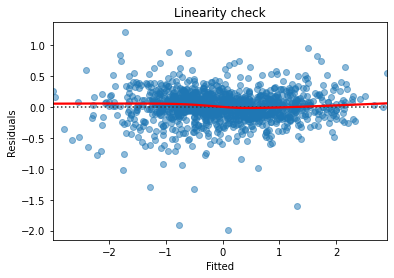


Expectation (mean) of residuals is zero?

Residuals mean:  -1.9005918599673306e-15 


Normality and Homoscedasticity (equal variance) of residuals



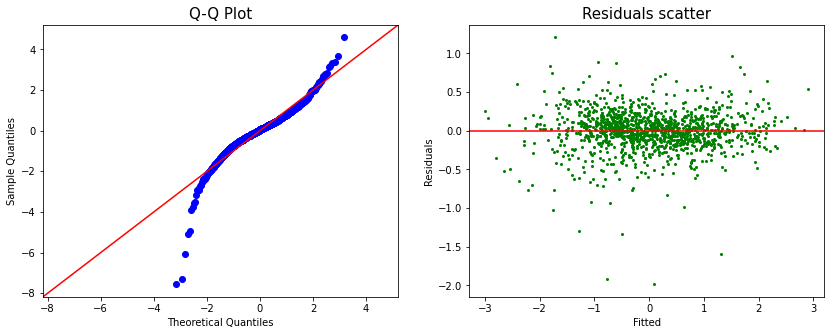

------------------------------------------------------------
Residuals normality test
Jarque-Bera test: ('Jarque-Bera', 3293.6461813024157) ('Chi^2 two-tail prob.', 0.0)
------------------------------------------------------------
Residuals homoscedasticity/heteroskedasticity test
Breush-Pagan test: ('Lagrange multiplier statistic', 136.8024045886536) ('p-value', 0.014514249898686896)

Autocorrelation of residuals

------------------------------------------------------------
Durbin-Watson statistic:  1.9064542318562614


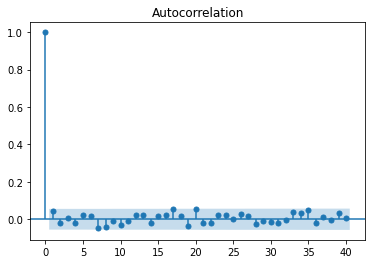

In [105]:
plot_residuals(RFE_model)